DecisionTreeClassifier (하이퍼파라미터)

LR()

# Keras를 사용한 개발 과정
1. 입력 텐서(X)와 출력 텐서(y)로 이뤄진 훈련 데이터를 정의
2. 입력과 출력을 연결하는 Layer(층)으로 이뤄진 네트워크(모델)을 정의
    - Sequential 방식: 순서대로 쌓아올린 네트워크로 이뤄진 모델을 생성하는 방식
    - Functional API 방식: 다양한 구조의 네트워크로 이뤄진 모델을 생성하는 방식
    - Subclass 방식: 네트워크를 정의하는 클래스를 구현.
    
3. 모델 컴파일
    - 모델이 Train(학습)할때 사용할 손실함수(Loss Function), 최적화기법(Optimizer), 학습과정을 모니터링할 평가지표(Metrics)를 설정
4. Training(훈련)
    - 모델의 fit() 메소드에 훈련데이터(X,y)를 넣어 Train.
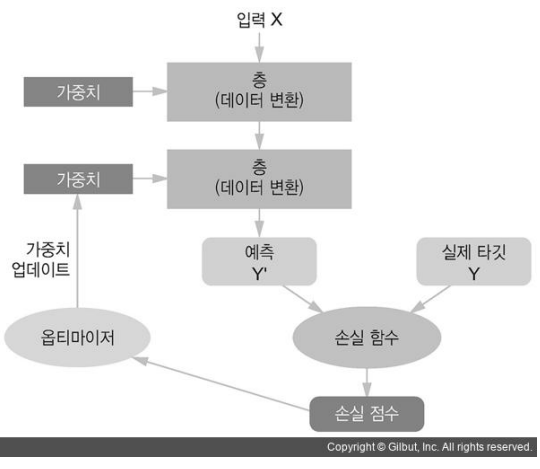

# MNIST 이미지 분류 
- ### [MNIST](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)(Modified National Institute of Standards and Technology) database
- 흑백 손글씨 숫자 0-9까지 10개의 범주로 구분해놓은 데이터셋
- 하나의 이미지는 28 * 28 pixel 의 크기
- 6만개의 Train 이미지와 1만개의 Test 이미지로 구성됨.

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
tf.__version__

'2.4.1'

In [32]:
keras.__version__

'2.4.0'

In [33]:
(X_train, y_train), (X_test, y_test)    = keras.datasets.mnist.load_data()

In [34]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [35]:
X_train.shape, X_test.shape # (이미지 개수, 세로, 가로, 채널())

((60000, 28, 28), (10000, 28, 28))

In [36]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [37]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

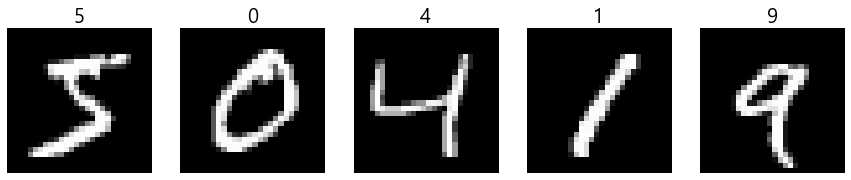

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
# 5개 이미지를 확일
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')

# plt.colorbar()
plt.show()

## 신경망 구현

## network : 전체 모델 구조 만들기

In [39]:
# 모델 생성
model = keras.Sequential() # 모델의 틀이 만들어짐.
# 층(Layer)을 모델에 추가.
model.add(keras.layers.Input((28,28))) # 틀에 (28,28)의 인풋을 넣음
model.add(keras.layers.Flatten())  # 틀에 Flatten을 넣음
model.add(keras.layers.Dense(256, activation='relu')) # 틀에 Dense를 넣음
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [41]:
!pip install pydot  pydotplus graphviz

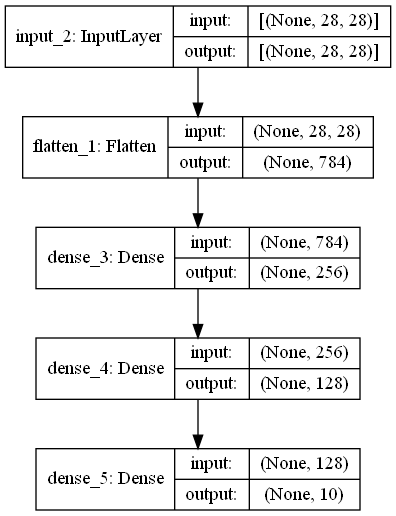

In [42]:
from tensorflow.keras.utils import plot_model
# plot_model(model)
plot_model(model, to_file='model.png', show_shapes=True)

## 컴파일 단계
- 구축된 모델에 추가 설정
- 손실함수
- Optimizer(최적화 함수)
- 평가지표

In [43]:
model.compile(optimizer='adam', # Optimizer 등록
             loss = 'categorical_crossentropy', # Loss Function 등록
             metrics = ['accuracy']) # 평가지표 - Training 도중에 validation 결과를 확인.

## 데이터 준비
- X
    - 0 ~ 1 사이의 값으로 정규화 시킨다. 
- y
    - one hot encoding 처리
    - tensorflow.keras 의 to_categorical() 함수 이용

In [44]:
X_train = X_train/255.
X_test= X_test/255.

In [45]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [46]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [47]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [48]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [49]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

## 학습 (fit)


In [50]:
model.fit(X_train, y_train,
          epochs=10, # epoch: 전체 train dataset을 한번 학습 -1 epoch
          batch_size=100, # 파라미터 업데이트(최적화)를 100개 마다 처리해라.
          validation_split=0.2) # 20%는 검증할 때 쓰라는 함수

Epoch 1/10
480/480 [==============================] - 7s 8ms/step - loss: 0.5146 - accuracy: 0.8520 - val_loss: 0.1366 - val_accuracy: 0.9583
Epoch 2/10
480/480 [==============================] - 3s 7ms/step - loss: 0.1135 - accuracy: 0.9653 - val_loss: 0.1019 - val_accuracy: 0.9694
Epoch 3/10
480/480 [==============================] - 3s 7ms/step - loss: 0.0671 - accuracy: 0.9790 - val_loss: 0.0910 - val_accuracy: 0.9721
Epoch 4/10
480/480 [==============================] - 3s 7ms/step - loss: 0.0474 - accuracy: 0.9851 - val_loss: 0.0876 - val_accuracy: 0.9737
Epoch 5/10
480/480 [==============================] - 3s 7ms/step - loss: 0.0343 - accuracy: 0.9895 - val_loss: 0.0905 - val_accuracy: 0.9737
Epoch 6/10
480/480 [==============================] - 4s 8ms/step - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0886 - val_accuracy: 0.9737
Epoch 7/10
480/480 [==============================] - 4s 8ms/step - loss: 0.0188 - accuracy: 0.9950 - val_loss: 0.0940 - val_accuracy: 0.9735
Epoch 

## 테스트셋 평가

In [54]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(test_loss, test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0946 - accuracy: 0.9763
0.09461801499128342 0.9763000011444092


### 추론 메소드
- predict()
    - 각 클래스 별 확률 반환
- <del>predict_class()</del>
    - 클래스(범주값) 반환
    - tensorflow 2.3 부터 deprecated 됨
- 이진 분류(binary classification)
    - `numpy.argmax(model.predict(x) > 0.5).astype("int32")`
- 다중클래스 분류(multi-class classification)
    - `numpy.argmax(model.predict(x), axis=-1)`
-     

In [57]:
X_test[:10].shape

(10, 28, 28)

In [59]:
import numpy as np
np.argmax(y_test[:10], axis=-1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [60]:
# 추론 => class별 확률
pred = model.predict(X_test[:10])

In [61]:
pred.shape

(10, 10)

In [64]:
np.round(pred, 3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.994, 0.   , 0.   , 0.   , 0.005,
        0.001],
       [0.   , 0.   , 0.005, 0.166, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.829],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.983, 0.014, 0.   , 0.002,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ]], dtype=float32)

In [65]:
np.argmax(pred, axis=-1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [66]:
model.predict_classes(X_test[:10])

C:\Users\shas9\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)